In [1]:
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Statevector
from qiskit.quantum_info.operators import Operator
import math

psi1 = Statevector([math.cos(math.pi/8),math.sin(math.pi/8)])
psi2 = Statevector([math.cos(5*math.pi/8),math.sin(5*math.pi/8)])

# When given a Statevector input, the Operator function returns the outer
# product of that state vector with itself — or, in other words, the
# product of the vector times its conjugate transpose.

H = Operator(psi1) - Operator(psi2)

display(array_to_latex(H))

<IPython.core.display.Latex object>

In [2]:
from math import pi, cos, sin
from qiskit import QuantumCircuit

theta = 0.7 # Can be changed to any value between 0 and 1

qc = QuantumCircuit(2, 1)

# Prepare eigenvector, which is the |1> state

qc.x(1)
qc.barrier()

# Implement the estimation procedure
qc.h(0)
qc.cp(2*pi*theta, 0, 1)
qc.h(0)
qc.barrier()

# Perform the final measurement
qc.measure(0, 0)

# Draw the circuit
display(qc.draw())

░ ┌───┐          ┌───┐ ░ ┌─┐
q_0: ──────░─┤ H ├─■────────┤ H ├─░─┤M├
     ┌───┐ ░ └───┘ │P(7π/5) └───┘ ░ └╥┘
q_1: ┤ X ├─░───────■──────────────░──╫─
     └───┘ ░                      ░  ║ 
c: 1/════════════════════════════════╩═
                                     0

In [3]:
from qiskit.primitives import Sampler
display(Sampler().run(qc).result().quasi_dists[0])

{0: 0.3454915028125262, 1: 0.6545084971874736}

In [4]:
display({   # Calculate predicted results
    0: cos(pi * theta) ** 2, 
    1: sin(pi * theta) ** 2
})

{0: 0.34549150281252616, 1: 0.6545084971874737}

In [5]:
from math import pi
from qiskit import QuantumCircuit

theta = .7
qc = QuantumCircuit(3, 2)

# Prepare the eigenvector
qc.x(2)
qc.barrier()

# The initial Hadamard gates
qc.h(0)
qc.h(1)
qc.barrier()

# The controlled unitary gates
qc.cp(2*pi*theta,0,2)
qc.cp(2*pi*(2*theta),1,2)
qc.barrier()

# An implementation of the inverse of the two-qubit QFT
qc.swap(0,1)
qc.h(0)
qc.cp(-pi/2,0,1)
qc.h(1)
qc.barrier()

# And finally the measurements
qc.measure([0, 1], [0, 1])
display(qc.draw())

░ ┌───┐ ░                       ░    ┌───┐                ░ ┌─┐   
q_0: ──────░─┤ H ├─░──■────────────────────░──X─┤ H ├─■──────────────░─┤M├───
           ░ ├───┤ ░  │                    ░  │ └───┘ │P(-π/2) ┌───┐ ░ └╥┘┌─┐
q_1: ──────░─┤ H ├─░──┼─────────■──────────░──X───────■────────┤ H ├─░──╫─┤M├
     ┌───┐ ░ └───┘ ░  │P(7π/5)  │P(14π/5)  ░                   └───┘ ░  ║ └╥┘
q_2: ┤ X ├─░───────░──■─────────■──────────░─────────────────────────░──╫──╫─
     └───┘ ░       ░                       ░                         ░  ║  ║ 
c: 2/═══════════════════════════════════════════════════════════════════╩══╩═
                                                                        0  1

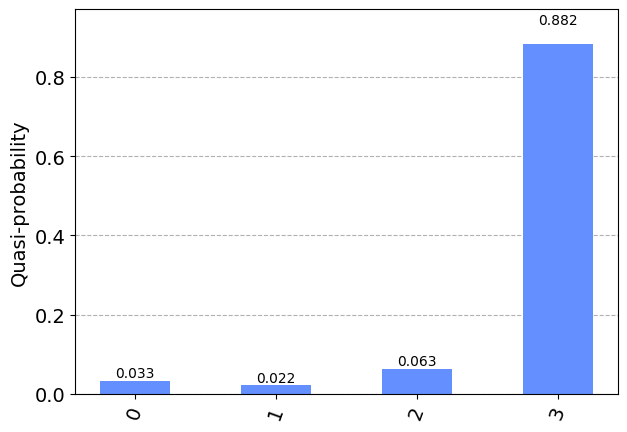

In [6]:
from qiskit.visualization import plot_histogram
result = Sampler().run(qc).result()
display(plot_histogram(result.quasi_dists))

In [7]:
from qiskit.circuit.library import QFT
display(QFT(4).decompose().draw())

┌───┐»
q_0: ──────────────────────────────────────■─────────────■────────■───────┤ H ├»
                                           │       ┌───┐ │        │P(π/2) └───┘»
q_1: ────────────────────■────────■────────┼───────┤ H ├─┼────────■─────────X──»
                   ┌───┐ │        │P(π/2)  │       └───┘ │P(π/4)            │  »
q_2: ──────■───────┤ H ├─┼────────■────────┼─────────────■──────────────────X──»
     ┌───┐ │P(π/2) └───┘ │P(π/4)           │P(π/8)                             »
q_3: ┤ H ├─■─────────────■─────────────────■───────────────────────────────────»
     └───┘                                                                     »
«        
«q_0: ─X─
«      │ 
«q_1: ─┼─
«      │ 
«q_2: ─┼─
«      │ 
«q_3: ─X─
«

In [8]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT

theta = .7
m = 3 # Number of control qubits

control_register = QuantumRegister(m, name="Control")
target_register = QuantumRegister(1, name="|ψ>")
output_register = ClassicalRegister(m, name="Result")
qc = QuantumCircuit(control_register, target_register, output_register)

# Prepare the eigenvector |ψ>
qc.x(target_register)
qc.barrier()

# Perform phase estimation
for index, qubit in enumerate(control_register):
    qc.h(qubit)
    for _ in range(2**index):
        qc.cp(2*pi*theta, qubit, target_register)
qc.barrier()

# Do inverse quantum Fourier transform
qc.compose(
    QFT(m, inverse=True),
    inplace=True
)

# Measure everything
qc.measure(range(m), range(m))
display(qc.draw())

░ ┌───┐                                                  »
Control_0: ──────░─┤ H ├─■────────────────────────────────────────────────»
                 ░ ├───┤ │                                                »
Control_1: ──────░─┤ H ├─┼─────────■─────────■────────────────────────────»
                 ░ ├───┤ │         │         │                            »
Control_2: ──────░─┤ H ├─┼─────────┼─────────┼─────────■─────────■────────»
           ┌───┐ ░ └───┘ │P(7π/5)  │P(7π/5)  │P(7π/5)  │P(7π/5)  │P(7π/5) »
      |ψ>: ┤ X ├─░───────■─────────■─────────■─────────■─────────■────────»
           └───┘ ░                                                        »
 Result: 3/═══════════════════════════════════════════════════════════════»
                                                                          »
«                                ░ ┌──────────┐┌─┐      
«Control_0: ─────────────────────░─┤0         ├┤M├──────
«                                ░ │          │└╥┘┌─┐   
«Control_1: ─────────────────────░─┤1 IQFT_dg ├─╫─┤M├───
«                                ░ │          │ ║ └╥┘┌─┐
«Control_2: ─■─────────■─────────░─┤2         ├─╫──╫─┤M├
«            │P(7π/5)  │P(7π/5)  ░ └──────────┘ ║  ║ └╥┘
«      |ψ>: ─■─────────■─────────░──────────────╫──╫──╫─
«                                ░              ║  ║  ║ 
« Result: 3/════════════════════════════════════╩══╩══╩═
«                                               0  1  2

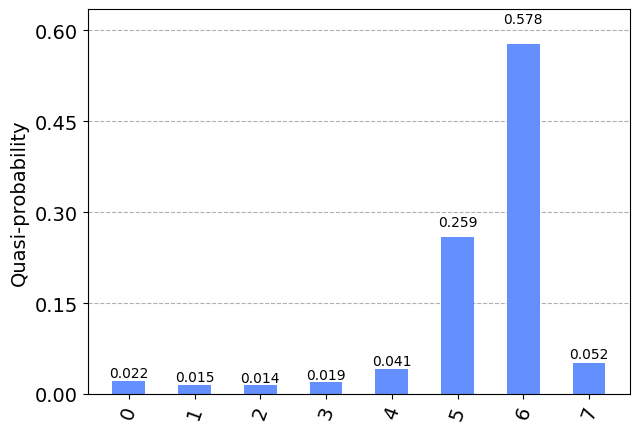

In [9]:
result = Sampler().run(qc).result()
display(plot_histogram(result.quasi_dists))